# Cat-Dog Classification

In [38]:
import numpy as np
import pandas as pd 
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator     
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

In [18]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)
training_set = train_datagen.flow_from_directory(
        './training_set/training_set',
        target_size=(64, 64),
        batch_size=32,
        class_mode='binary')

Found 8005 images belonging to 2 classes.


In [26]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_set= test_datagen.flow_from_directory(
        './test_set/test_set',
        target_size=(64, 64),
        batch_size=32,
        class_mode='binary')

Found 2023 images belonging to 2 classes.


In [29]:
test_set.image_shape

(64, 64, 3)

In [33]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [34]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [41]:
history = model.fit(x=training_set, validation_data=test_set, epochs=25)

Epoch 1/25
251/251 [==============================] - 40s 161ms/step - loss: 0.2394 - accuracy: 0.9008 - val_loss: 0.4419 - val_accuracy: 0.8334
Epoch 2/25
251/251 [==============================] - 43s 171ms/step - loss: 0.2178 - accuracy: 0.9068 - val_loss: 0.4889 - val_accuracy: 0.8201
Epoch 3/25
251/251 [==============================] - 42s 168ms/step - loss: 0.2127 - accuracy: 0.9131 - val_loss: 0.4458 - val_accuracy: 0.8250
Epoch 4/25
251/251 [==============================] - 42s 168ms/step - loss: 0.2085 - accuracy: 0.9147 - val_loss: 0.4104 - val_accuracy: 0.8423
Epoch 5/25
251/251 [==============================] - 45s 179ms/step - loss: 0.1895 - accuracy: 0.9227 - val_loss: 0.4654 - val_accuracy: 0.8428
Epoch 6/25
251/251 [==============================] - 44s 177ms/step - loss: 0.1814 - accuracy: 0.9255 - val_loss: 0.4765 - val_accuracy: 0.8359
Epoch 7/25
251/251 [==============================] - 53s 213ms/step - loss: 0.1886 - accuracy: 0.9218 - val_loss: 0.4820 - val_ac

64/64 - 3s - loss: 0.6399 - accuracy: 0.8413 - 3s/epoch - 40ms/step


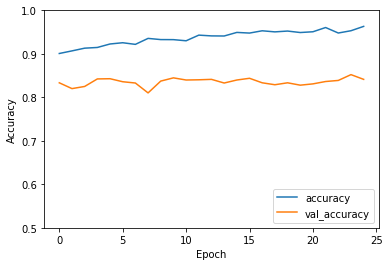

In [46]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_set, verbose=2)